In [ ]:
import numpy as np
import pickle
import tensorflow as tf

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

# overflow 방지
def softmax(a):
    c = np.max(a) # list a 중 가장 큰 값
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

그림 3-24 MNIST 이미지 데이터셋의 예

 - 0부터 9까지의 숫자 이미지로 구성
 - 훈련 이미지 60,000장, **시험 이미지 10,000장**
 - 훈련 이미지를 사용하여 모델 학습
 - 학습한 모델로 시험 이미지들을 얼마나 정확하게 분류하는지 평가


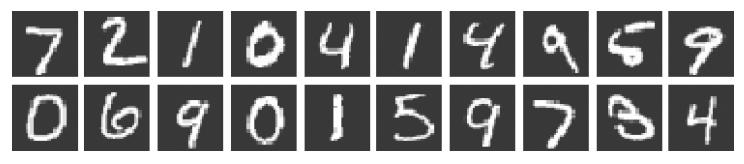

In [ ]:
def get_data():
    (x_train,t_train),(x_test,t_test) = tf.keras.datasets.mnist.load_data()
    print('=======================')
    print('x_train : ', x_train.shape)    # train용 dataset
    print('t_train : ', t_train.shape)    # train용 정답
    print('x_test : ', x_test.shape)      # test용 dataset
    print('t_test : ', t_test.shape)      # test용 정답
    x_test = x_test.reshape(10000,-1)
    x_test = x_test.astype('float32') / 255. #normalize 데이터를 0과 1사이로
    print('=======================')
    print('x_test : ', x_test.shape)      # test용 dataset
    print('t_test : ', t_test.shape)      # test용 정답
    return x_test, t_test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def init_network():
    #with open("/content/drive/MyDrive/Colab Notebooks/deep_learning_start/sample_weight.pkl", 'rb') as f: #저장된 wieght파일을 불러와 model에 적용
    with open("/content/sample_weight.pkl", 'rb') as f: #저장된 wieght파일을 불러와 model에 적용
        network = pickle.load(f)

    # network parameter를 알기위해 추가됨
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #위와 같은 3층 layer 구현
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    print('=======================')
    print('W1 : ', W1.shape)
    print('W2 : ', W2.shape)
    print('W3 : ', W3.shape)
    print('b1 : ', b1.shape)
    print('b2 :', b2.shape)
    print('b3 :', b3.shape)

    return network

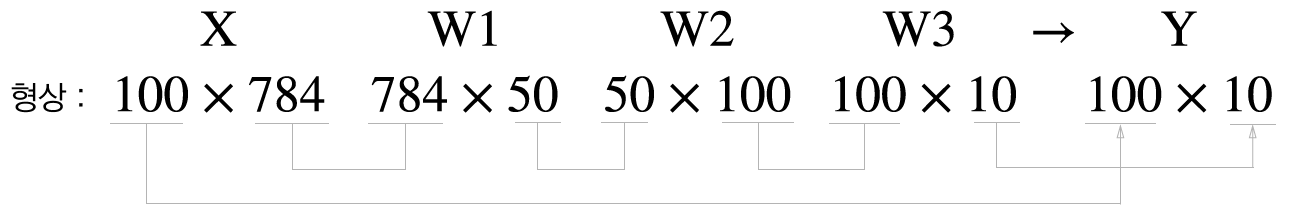

In [ ]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #위와 같은 3층 layer 구현
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1     # (100, 784)(784, 50) => (100, 50)
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2    # (100, 50)(50, 100)  => (100, 100)
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3    # (100, 100)(100, 10) => (100,10)
    y = softmax(a3)
    return y

In [ ]:
x, t = get_data()
network = init_network()
#print(W1.shape)
#print(W2.shape)
#print(W3.shape)


x_train :  (60000, 28, 28)
t_train :  (60000,)
x_test :  (10000, 28, 28)
t_test :  (10000,)
x_test :  (10000, 784)
t_test :  (10000,)
W1 :  (784, 50)
W2 :  (50, 100)
W3 :  (100, 10)
b1 :  (50,)
b2 : (100,)
b3 : (10,)


1장씩 처리

In [ ]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print('=======================')
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
#print(x[0].shape)

Accuracy:0.9352


배치 처리

In [ ]:
accuracy_cnt = 0
batch_size = 100 # 배치 크기

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size] # 이미지 1개씩이 아닌 batch size만큼의 이미지를 넘겨줘 한번에 연산
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
#print(x[0:0+batch_size].shape)

Accuracy:0.9352
